# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
dataset=pd.read_csv('price.csv')
dataset.head(10)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
5,6,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000
6,7,13153.0,11869.0,17811.0,1542.0,1858.0,No Parking,CAT A,1030,7224000
7,8,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000
8,9,7495.0,11589.0,13370.0,1090.0,1321.0,Not Provided,CAT B,680,4631000
9,10,8233.0,7067.0,11400.0,1030.0,1235.0,Open,CAT C,1130,4415000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Observation    936 non-null    int64  
 1   Dist_Taxi      923 non-null    float64
 2   Dist_Market    923 non-null    float64
 3   Dist_Hospital  935 non-null    float64
 4   Carpet         928 non-null    float64
 5   Builtup        921 non-null    float64
 6   Parking        936 non-null    object 
 7   City_Category  936 non-null    object 
 8   Rainfall       936 non-null    int64  
 9   House_Price    936 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 73.2+ KB


## Finding Missing Value 

In [4]:
dataset.isnull().sum()

Observation       0
Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64

## Handling Missing Value

In [5]:
dataset.fillna(method='ffill', inplace=True)

## Finding Outliers 

In [6]:
def get_lower_upper_bound(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [7]:
def get_outlier_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

In [8]:
print(get_outlier_iqr(dataset['House_Price'].values))
print(get_outlier_iqr(dataset['Builtup'].values))

[150000000  11632000     30000]
[ 2617.   932. 12730.  2667.  2647.   951.]


<AxesSubplot:xlabel='House_Price'>

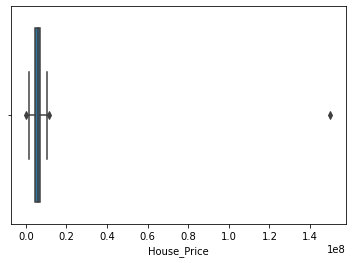

In [11]:
sns.boxplot(x='House_Price', data=dataset)

<AxesSubplot:xlabel='Builtup'>

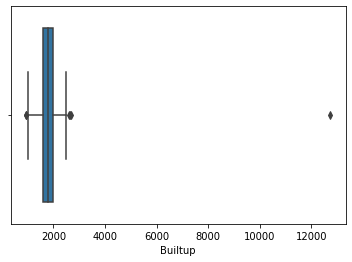

In [12]:
sns.boxplot(x='Builtup', data=dataset)

## Handling Outlier 

In [25]:
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~((df<(Q1 -1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [26]:
df_outlier_remove = remove_outlier_IQR(dataset[['Builtup','House_Price']])

df_outlier_remove.dropna(axis=0, inplace = True)

In [27]:
df_outlier_remove

,Builtup,House_Price
0,1961.0,6649000.0
1,1752.0,3982000.0
2,1609.0,5401000.0
3,1748.0,5373000.0
4,2111.0,4662000.0
...,...,...
931,1429.0,5434000.0
932,1851.0,7062000.0
933,1337.0,7227000.0
934,1851.0,7062000.0


In [28]:
df_outlier_remove.isnull().sum()

Builtup        0
House_Price    0
dtype: int64

<AxesSubplot:xlabel='House_Price'>

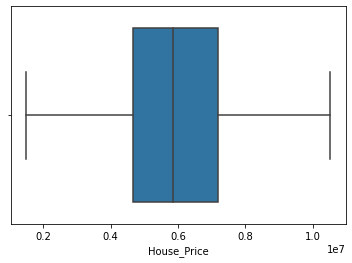

In [29]:
sns.boxplot(x='House_Price', data=df_outlier_remove)

<AxesSubplot:xlabel='Builtup'>

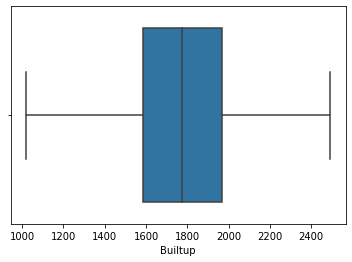

In [30]:
sns.boxplot(x='Builtup', data=df_outlier_remove)

## Scaling Data 

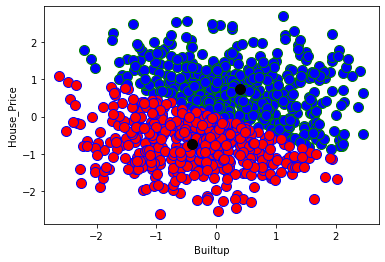

In [43]:
# Feature Scaling

sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_remove.astype(float))

# clustering with KMeans
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_

new_dfoutlier_std = pd.DataFrame(data=dfoutlier_std, columns=['Builtup','House_Price'])
new_dfoutlier_std['label_kmeans1'] = labels1

plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans1 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans1 == 1], c='red', s=100, edgecolor='blue', linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100);
plt.xlabel('Builtup')
plt.ylabel('House_Price')
plt.show()

## Using the elbow method to find the optional number of clusters 

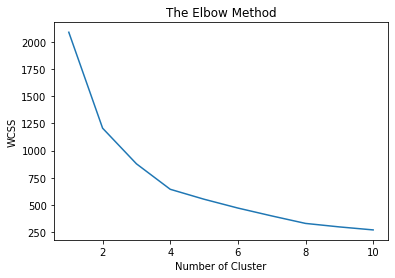

In [37]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++', random_state=42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset 

In [38]:
kmeans2 = KMeans(n_clusters=4, init='k-means++',random_state=42).fit(dfoutlier_std)

kmeans2.labels_

array([3, 0, 0, 2, 2, 0, 3, 0, 0, 0, 1, 2, 2, 2, 1, 3, 3, 2, 1, 0, 2, 0,
       1, 2, 2, 0, 3, 0, 2, 1, 3, 3, 1, 0, 1, 3, 1, 2, 0, 1, 2, 0, 1, 0,
       0, 3, 2, 0, 0, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 0, 3, 1, 3, 2, 3, 1,
       2, 2, 1, 2, 3, 2, 1, 2, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 2, 1, 0, 3,
       1, 2, 1, 2, 3, 0, 0, 0, 0, 3, 2, 0, 3, 2, 3, 3, 3, 2, 1, 3, 1, 1,
       0, 1, 3, 3, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 3, 0, 3,
       3, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 2, 1, 0,
       0, 2, 0, 0, 3, 3, 3, 2, 0, 1, 3, 0, 0, 2, 0, 1, 3, 2, 0, 1, 0, 0,
       1, 0, 3, 0, 2, 2, 0, 3, 3, 2, 2, 3, 0, 3, 3, 1, 0, 2, 3, 2, 1, 2,
       1, 3, 1, 3, 2, 3, 3, 1, 3, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0,
       1, 3, 3, 1, 2, 3, 2, 1, 1, 1, 2, 1, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0,
       0, 1, 3, 0, 1, 3, 2, 3, 1, 2, 3, 3, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0,
       2, 1, 3, 1, 3, 0, 0, 0, 1, 3, 0, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 3,
       2, 2, 2, 3, 0, 1, 2, 2, 0, 3, 0, 0, 2, 1, 2,

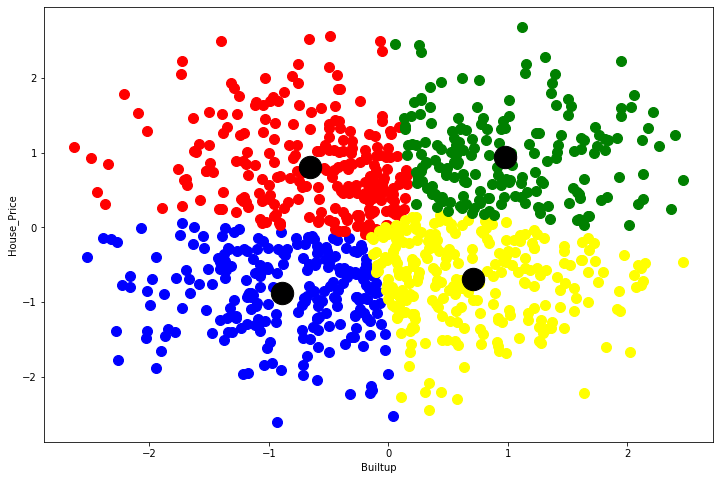

In [44]:
# kmeans = KMeans(n_clusters=3, random_state=42).fit(dfoutlier_std)
labels2 = kmeans2.labels_

new_dfoutlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans2 == 0], c='blue', s=100, edgecolor='blue', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans2 == 1], c='red', s=100, edgecolor='red', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans2 == 2], c='yellow', s=100, edgecolor='yellow', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans2 == 3], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans2 == 3], c='green', s=100, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500)
plt.xlabel('Builtup')
plt.ylabel('House_Price')
plt.show()


In [46]:
from sklearn.metrics import silhouette_score

print(silhouette_score(new_dfoutlier_std, labels=labels1))
print(silhouette_score(new_dfoutlier_std, labels=labels2))

0.34186743743059866
0.4929486730735917
